В приложенном файле — данные по ежемесячному уровню производства молока в фунтах на одну корову.

Загрузите ряд, создайте новый ряд значений среднего дневного уровня производства молока в фунтах на одну корову, поделив на число дней в месяце (вычисляется с помощью функции monthrange из пакета calendar). Постройте график полученного ряда; какой из приведённых ниже графиков у вас получился?

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [43]:
data = pd.read_csv("monthly-milk-production.csv", sep = ";", index_col=['month'], parse_dates=['month'], dayfirst=True)

In [44]:
average = data["milk"]/ data.index.days_in_month
average

month
1962-01-01    19.000000
1962-02-01    20.035714
1962-03-01    20.645161
1962-04-01    21.866667
1962-05-01    23.451613
                ...    
1975-08-01    27.677419
1975-09-01    27.233333
1975-10-01    26.677419
1975-11-01    26.566667
1975-12-01    27.193548
Length: 168, dtype: float64

In [45]:
data["average"] = average.values

In [46]:
data

,milk,average
month,,
1962-01-01,589,19.000000
1962-02-01,561,20.035714
1962-03-01,640,20.645161
1962-04-01,656,21.866667
1962-05-01,727,23.451613
...,...,...
1975-08-01,858,27.677419
1975-09-01,817,27.233333
1975-10-01,827,26.677419


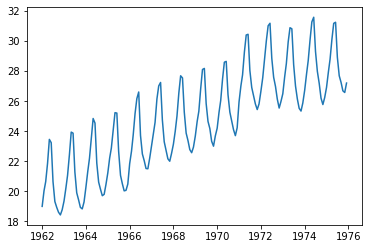

In [47]:
plt.plot(data["average"])

Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерия Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным.

Дифференцирование можно делать так:


milk.daily_diff1 = milk.daily - milk.daily.shift(1)

Чтобы сделать сезонное дифференцирование, нужно изменить значение параметра у функции shift:

milk.daily_diff12 = milk.daily - milk.daily.shift(12)

При дифференцировании длина ряда сокращается, поэтому в части строк в новой колонке значения будут не определены (NaN). Подавая полученные столбцы на вход критерию Дики-Фуллера, отрезайте неопределённые значения, иначе вы получите неопределённый достигаемый уровень значимости.

Итак, какое дифференцирование делает ряд стационарным?

Дифференцирование не нужно, исходный ряд уже стационарен


Ряд становится стационарным после однократного дифференцирования


Ряд становится стационарным после сезонного дифференцирования


**Ряд становится стационарным после двух последовательных дифференцирований — сезонного и обычного**



In [48]:
data["average_diff1"] = data.average - data.average.shift(1)
data

,milk,average,average_diff1
month,,,
1962-01-01,589,19.000000,NaN
1962-02-01,561,20.035714,1.035714
1962-03-01,640,20.645161,0.609447
1962-04-01,656,21.866667,1.221505
1962-05-01,727,23.451613,1.584946
...,...,...,...
1975-08-01,858,27.677419,-1.225806
1975-09-01,817,27.233333,-0.444086
1975-10-01,827,26.677419,-0.555914


In [49]:
data.average_diff1.dropna().values

array([ 1.03571429,  0.609447  ,  1.22150538,  1.58494624, -0.21827957,
       -2.58817204, -1.32258065, -0.38924731, -0.32043011, -0.17956989,
        0.34086022,  0.58064516,  0.859447  ,  0.85023041,  1.3688172 ,
        1.50215054, -0.0688172 , -2.57634409, -1.38709677, -0.46989247,
       -0.49784946, -0.10215054,  0.45698925,  0.96774194,  1.05228031,
        0.88320356,  1.30645161,  1.33870968, -0.30537634, -2.66236559,
       -1.25806452, -0.47956989, -0.42365591,  0.09032258,  0.6516129 ,
        0.77419355,  0.98847926,  0.65668203,  1.19569892,  1.15913978,
       -0.02580645, -2.55483871, -1.58064516, -0.56451613, -0.46774194,
        0.0344086 ,  0.4172043 ,  1.35483871,  0.83986175,  1.06336406,
        1.42473118,  0.99462366,  0.43870968, -2.89032258, -1.22580645,
       -0.45053763, -0.5172043 , -0.01612903,  0.69354839,  0.80645161,
        0.82142857,  0.75921659,  1.55268817,  0.86666667,  0.23333333,
       -2.49139785, -1.4516129 , -0.59032258, -0.53870968, -0.16

Критерий Дики-Фуллера.

Гипотеза: ряд не стационарен.

In [50]:
sm.tsa.stattools.adfuller(data.average_diff1.dropna().values)

(-2.7594694762289533,
 0.06430054654174037,
 11,
 155,
 {'1%': -3.4732590518613002,
  '10%': -2.5768120811654525,
  '5%': -2.880374082105334},
 -1.153997338105512)

p > 0.05, отклонить гипотезу не удалось.

In [51]:
data["average_diff12"] = data.average - data.average.shift(12)
data

,milk,average,average_diff1,average_diff12
month,,,,
1962-01-01,589,19.000000,NaN,NaN
1962-02-01,561,20.035714,1.035714,NaN
1962-03-01,640,20.645161,0.609447,NaN
1962-04-01,656,21.866667,1.221505,NaN
1962-05-01,727,23.451613,1.584946,NaN
...,...,...,...,...
1975-08-01,858,27.677419,-1.225806,-0.290323
1975-09-01,817,27.233333,-0.444086,0.066667
1975-10-01,827,26.677419,-0.555914,0.483871


In [52]:
sm.tsa.stattools.adfuller(data.average_diff12.dropna().values)

(-2.1594860932888076,
 0.22127672658830383,
 12,
 143,
 {'1%': -3.4769274060112707,
  '10%': -2.577665408088415,
  '5%': -2.8819726324025625},
 -25.225679141303317)

p > 0.05, отклонить гипотезу не удалось.

In [55]:
data["average_diff1_12"] = data.average_diff1 - data.average_diff1.shift(12)
data

,milk,average,average_diff1,average_diff12,average_diff1_12
month,,,,,
1962-01-01,589,19.000000,NaN,NaN,NaN
1962-02-01,561,20.035714,1.035714,NaN,NaN
1962-03-01,640,20.645161,0.609447,NaN,NaN
1962-04-01,656,21.866667,1.221505,NaN,NaN
1962-05-01,727,23.451613,1.584946,NaN,NaN
...,...,...,...,...,...
1975-08-01,858,27.677419,-1.225806,-0.290323,0.096774
1975-09-01,817,27.233333,-0.444086,0.066667,0.356989
1975-10-01,827,26.677419,-0.555914,0.483871,0.417204


In [56]:
sm.tsa.stattools.adfuller(data.average_diff1_12.dropna().values)

(-5.481326334796926,
 2.2808455518037347e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '10%': -2.577665408088415,
  '5%': -2.8819726324025625},
 -20.905137509892256)

p < 0.05, гипотезу отклоняем. Ряд стационарен.

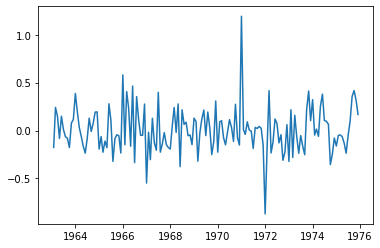

In [62]:
plt.plot(data.average_diff1_12)

Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции. Это можно cделать так:


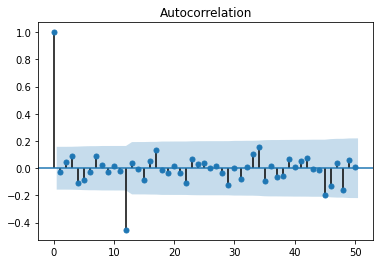

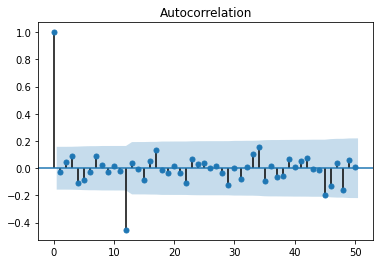

In [66]:
sm.graphics.tsa.plot_acf(data.average_diff1_12.dropna().values.squeeze(), lags=50)

Исходя из этого графика, какое начальное приближение вы предложили бы для параметра Q в модели SARIMA?

1


Для того же ряда, что и в предыдущем вопросе, постройте график частичной автокорреляционной функции. 

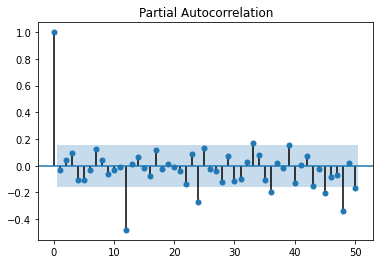

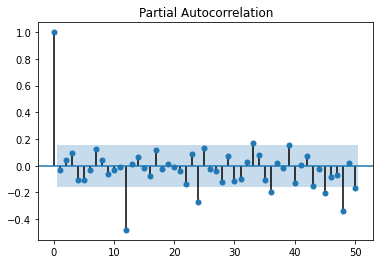

In [67]:
sm.graphics.tsa.plot_pacf(data.average_diff1_12.dropna().values.squeeze(), lags=50)


Исходя из этого графика, какое начальное приближение вы предложили бы для параметра p в модели SARIMA?

0